In [1]:
import pandas as pd
import numpy as np
df_n = pd.read_csv("out.csv")
df_o = pd.read_csv("new.csv")
data = pd.read_csv("dataset.csv")
data = data.iloc[:,1:]

emotion = df_o.iloc[:,4]
print(data)

             0          1          2           3          4          5  \
0    37.275390   7.091289  22.408050   75.057394 -79.186066  64.777248   
1    35.058061   6.383887  25.934039   94.483698 -74.751924  62.586091   
2    30.905026   9.543419  24.383575  110.813165 -80.922596  62.023324   
3    40.219710  11.092948  28.819444  106.647611 -83.829976  70.150141   
4    48.587126  10.244982  32.699414   80.045979 -74.229954  75.716847   
..         ...        ...        ...         ...        ...        ...   
975  34.882828   7.230665  20.815900   55.806705 -82.957266  68.510759   
976  44.270820  13.509723  25.003323   78.366010 -88.762473  78.358998   
977  44.896504  12.265393  23.487181   81.537653 -89.039486  73.183996   
978  49.432277  14.466538  26.174688   88.513804 -97.088641  79.552537   
979  40.390815  11.538288  19.900956   70.186600 -64.564352  70.835693   

             6           7          8  
0    66.257605 -145.292062 -15.107924  
1    77.136361 -135.388626 -14.

In [11]:
import pandas as pd
from matplotlib import pyplot
from keras.models import Sequential
from math import sqrt 
import numpy as np 
import scipy.misc 
from IPython.display import display 
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator 
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization,Activation,Average
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.optimizers import Adam, SGD
from keras.regularizers import l1, l2
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

import pandas as pd
from matplotlib import pyplot
from math import sqrt 
import numpy as np 
import scipy.misc 
from IPython.display import display 
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator 
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.optimizers import Adam, SGD
from keras.regularizers import l1, l2
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools



# def create_model(input_shape=(48,48,1)):
#     # first input model
#     visible = Input(shape=input_shape, name='input')
#     num_classes = 7
#     #the 1-st block
#     conv1_1 = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_1')(visible)
#     conv1_1 = BatchNormalization()(conv1_1)
#     conv1_2 = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_2')(conv1_1)
#     conv1_2 = BatchNormalization()(conv1_2)
#     pool1_1 = MaxPooling2D(pool_size=(2,2), name = 'pool1_1')(conv1_2)
#     drop1_1 = Dropout(0.3, name = 'drop1_1')(pool1_1)

#     #the 2-nd block
#     conv2_1 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_1')(drop1_1)
#     conv2_1 = BatchNormalization()(conv2_1)
#     conv2_2 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_2')(conv2_1)
#     conv2_2 = BatchNormalization()(conv2_2)
#     conv2_3 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_3')(conv2_2)
#     conv2_2 = BatchNormalization()(conv2_3)
#     pool2_1 = MaxPooling2D(pool_size=(2,2), name = 'pool2_1')(conv2_3)
#     drop2_1 = Dropout(0.3, name = 'drop2_1')(pool2_1)

#     #the 3-rd block
#     conv3_1 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_1')(drop2_1)
#     conv3_1 = BatchNormalization()(conv3_1)
#     conv3_2 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_2')(conv3_1)
#     conv3_2 = BatchNormalization()(conv3_2)
#     conv3_3 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_3')(conv3_2)
#     conv3_3 = BatchNormalization()(conv3_3)
#     conv3_4 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_4')(conv3_3)
#     conv3_4 = BatchNormalization()(conv3_4)
#     pool3_1 = MaxPooling2D(pool_size=(2,2), name = 'pool3_1')(conv3_4)
#     drop3_1 = Dropout(0.3, name = 'drop3_1')(pool3_1)

#     #the 4-th block
#     conv4_1 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_1')(drop3_1)
#     conv4_1 = BatchNormalization()(conv4_1)
#     conv4_2 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_2')(conv4_1)
#     conv4_2 = BatchNormalization()(conv4_2)
#     conv4_3 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_3')(conv4_2)
#     conv4_3 = BatchNormalization()(conv4_3)
#     conv4_4 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_4')(conv4_3)
#     conv4_4 = BatchNormalization()(conv4_4)
#     pool4_1 = MaxPooling2D(pool_size=(2,2), name = 'pool4_1')(conv4_4)
#     drop4_1 = Dropout(0.3, name = 'drop4_1')(pool4_1)

#     #the 5-th block
#     conv5_1 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_1')(drop4_1)
#     conv5_1 = BatchNormalization()(conv5_1)
#     conv5_2 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_2')(conv5_1)
#     conv5_2 = BatchNormalization()(conv5_2)
#     conv5_3 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_3')(conv5_2)

# ￼
#     conv5_4 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_4')(conv5_3)
#     conv5_3 = BatchNormalization()(conv5_3)
#     pool5_1 = MaxPooling2D(pool_size=(2,2), name = 'pool5_1')(conv5_4)
#     drop5_1 = Dropout(0.3, name = 'drop5_1')(pool5_1)

#     #Flatten and output
#     flatten = Flatten(name = 'flatten')(drop5_1)
#     ouput = Dense(64, activation='relu', name = 'output')(flatten)

#     # create model 
#     model = Model(inputs =visible, outputs = ouput)
#     # summary layers
#     # model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='RMSprop')
    
    
#     return model


def create_model_lite():
    input_shape=(48,48,1)

    model = Sequential()
    model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64, activation = 'relu'))
  
    
    
    
    return model

def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(64,input_shape=(9,), activation='relu'))
	
	
	
	return model


In [12]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
from random import shuffle
import os
import cv2

def _load_KDEF():
        class_to_arg = {'AN': 0, 'DI': 1, 'AF': 2, 'HA': 3, 'SA': 4, 'SU': 5, 'NE': 6}
        num_classes = len(class_to_arg)

        file_paths = df_o.iloc[:,2]
        
        num_faces = len(file_paths)
        neutral_count = 0
        cc=0
        y_size, x_size = (48, 48)
        faces = np.zeros(shape=(num_faces, y_size, x_size))
        face_data = np.zeros(shape=(980, y_size, x_size))
        neutral_faces = np.zeros(shape=(int(num_faces/5), y_size, x_size))
        neutral_paths = []

        face_data = []
        emotions = np.zeros(shape=(num_faces, num_classes))
        for file_arg, file_path in enumerate(file_paths):
            image_array = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            image_array = cv2.resize(image_array, (y_size, x_size))
            faces[file_arg] = image_array
            file_basename = os.path.basename(file_path)
            file_emotion = file_basename[4:6]
            file_angle = file_basename[6]
           
            try:
                emotion_arg = class_to_arg[file_emotion]
            except:
                continue
            emotions[file_arg, emotion_arg] = 1
        faces = np.expand_dims(faces, -1)
        return file_paths,neutral_paths,neutral_faces,faces, emotions

file_paths,neutral_paths,neutral_faces,faces, emotions = _load_KDEF()
print(faces.shape)

(980, 48, 48, 1)


In [13]:
model1 = create_model_lite()
print(model1.summary())
model2 = baseline_model()
print(model2.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 48, 48, 6)         156       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 6)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 16)        2416      
_________________________________________________________________
activation_3 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 64)        9280      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)         

In [15]:


from keras.utils.vis_utils import plot_model
import pydot_ng as pydot


plot_model(final_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

NameError: name 'final_model' is not defined

In [16]:
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing 

scalar = StandardScaler()

X = scalar.fit_transform(data)
print(X)

X = preprocessing.normalize(X, norm='l2')

encoder = LabelEncoder()
encoder.fit(emotion)
y = encoder.transform(emotion)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(y)
  # Broadcast the server weights to the clients.
print(dummy_y)


[[ 0.45360778 -0.33873129 -0.36249866 ... -1.28115548 -0.60709425
  -1.27581468]
 [ 0.21210024 -0.51537323  0.0650534  ... -0.52155891  0.06726181
  -0.95186305]
 [-0.24024097  0.27357903 -0.12295177 ...  0.34257807 -0.05845285
  -0.23652968]
 ...
 [ 1.2836859   0.95327078 -0.23164608 ... -0.307979   -0.39077656
  -0.82237587]
 [ 1.77771421  1.50290875  0.0942339  ... -0.65366489  0.62558358
  -1.74710241]
 [ 0.79293423  0.77170864 -0.66650226 ... -0.99288809 -0.24093149
  -1.29752226]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)
from keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(  # Broadcast the server weights to the clients.
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")
    

In [56]:
import numpy as np
from sklearn.model_selection import train_test_split

i=range(980)
encoder = LabelEncoder()
encoder.fit(emotion)
y = encoder.transform(emotion)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(y)

faces_1 = faces/255

i_train, i_test = train_test_split(i,test_size=0.2)

X_train=(data.iloc[i_train])
Z_train=(faces_1[i_train])
Y_train=(dummy_y[i_train])
X_test=(data.iloc[i_test])
Y_test=(dummy_y[i_test])
Z_test=(faces_1[i_test])
M_train=emotion[i_train]
M_test=emotion[i_test]

print(M_train.shape)


#([2, 0, 3], [1, 4])

(784,)


In [19]:
import collections
import attr
import functools
import numpy as np
import tensorflow as tf
import tensorflow_federated as tff
import pandas as pd
from matplotlib import pyplot
from keras.models import Sequential
from math import sqrt 
import numpy as np 
import scipy.misc 
from IPython.display import display 
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator 
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization,Activation,Average
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.optimizers import Adam, SGD
from keras.regularizers import l1, l2
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

import nest_asyncio
nest_asyncio.apply()

np.random.seed(0)


In [20]:
import pandas as pd
import numpy as np
df_n = pd.read_csv("out.csv")
df_o = pd.read_csv("new.csv")
data = pd.read_csv("dataset.csv")
data = data.iloc[:,1:]

emotion = df_o.iloc[:,4]
df = pd.concat([data, emotion], ignore_index=True, axis=1)

TRAIN_DATA_PER_CLIENT = 50

TRAINING_EPOCHS = 3


x_client_1 = data[0 : TRAIN_DATA_PER_CLIENT]
y_client_1 = emotion[0 : TRAIN_DATA_PER_CLIENT]

In [57]:
M_train.shape

(784,)

In [61]:
from tensorflow import reshape
from collections import OrderedDict
from keras.layers import add
tf.keras.backend.set_floatx('float64')

def create_federated_data(x_train,y_train):
    orderDict = OrderedDict()


    orderDict['x'] = np.array(x_train)
    orderDict['y'] = tf.reshape(y_train, [-1, 1])
    dataset = tf.data.Dataset.from_tensor_slices(orderDict)
    batch = dataset.shuffle(10).batch(5)

    return batch

federated_data_client_1 = [create_federated_data(Z_train,M_train) for epoch in range(TRAINING_EPOCHS)]

federated_data_client_1

[<BatchDataset shapes: OrderedDict([(x, (None, 48, 48, 1)), (y, (None, 1))]), types: OrderedDict([(x, tf.float64), (y, tf.int64)])>,
 <BatchDataset shapes: OrderedDict([(x, (None, 48, 48, 1)), (y, (None, 1))]), types: OrderedDict([(x, tf.float64), (y, tf.int64)])>,
 <BatchDataset shapes: OrderedDict([(x, (None, 48, 48, 1)), (y, (None, 1))]), types: OrderedDict([(x, tf.float64), (y, tf.int64)])>]

In [59]:
def model_fn():
  keras_model = create_model_lite()
  return tff.learning.from_keras_model(
      keras_model,
      input_spec=federated_data_client_1[0].element_spec,
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [62]:
iterative_process = tff.learning.build_federated_averaging_process(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=0.02))

str(iterative_process.initialize.type_signature)

'( -> <model=<trainable=<float64[5,5,1,6],float64[6],float64[5,5,6,16],float64[16],float64[3,3,16,64],float64[64],float64[1600,64],float64[64]>,non_trainable=<>>,optimizer_state=<int64>,delta_aggregate_state=<value_sum_process=<>,weight_sum_process=<>>,model_broadcast_state=<>>@SERVER)'

In [63]:
state = iterative_process.initialize()

Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


In [65]:
state, metrics = iterative_process.next(state, federated_data_client_1)
print('round  1, metrics={}'.format(metrics))

round  1, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('train', OrderedDict([('sparse_categorical_accuracy', 0.15178571428571427), ('loss', 7.2973466)])), ('stat', OrderedDict([('num_examples', 2352)]))])


In [27]:
import tensorflow_federated as tff

# Create dummy batch
dummy_batch = tf.nest.map_structure(lambda x: x.numpy(), iter(federated_data_client_1[0]).next())
print(dummy_batch['x'].shape)

def create_federated_model():

    # Create keras model
    keras_model = create_model_lite()
    
    # Convert keras model to federated model
    return tff.learning.from_keras_model(
      keras_model,
      input_spec=federated_data_client_1[0].element_spec,
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])


AttributeError: 'odict_iterator' object has no attribute 'next'

In [135]:
def tcreate_keras_model():
  return tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(784,)),
      tf.keras.layers.Dense(10, kernel_initializer='zeros'),
      tf.keras.layers.Softmax(),
  ])

In [141]:

def tmodel_fn():
  # We _must_ create a new model here, and _not_ capture it from an external
  # scope. TFF will call this within different graph contexts.
  keras_model = tcreate_keras_model()
  return tff.learning.from_keras_model(
      keras_model,
      input_spec=federated_data_client_1[0].element_spec,
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [142]:
iterative_process = tff.learning.build_federated_averaging_process(
    tmodel_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=0.02),
    server_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=1.0))

TypeError: in user code:


    TypeError: tf___forward_pass() missing 1 required positional argument: 'batch_input'


In [133]:
# Build federated average process
trainer = tff.learning.build_federated_averaging_process(create_federated_model,
client_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=0.02))

# Create initial state
train_state = trainer.initialize()

TypeError: in user code:


    TypeError: tf___forward_pass() missing 1 required positional argument: 'batch_input'


In [10]:
# from matplotlib import pyplot
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *

early = EarlyStopping(monitor="val_loss", mode="min", patience=8)
callbacks_list = [ early]
final_model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
history = final_model.fit([Z_train,X_train], Y_train, epochs=50 ,callbacks=callbacks_list,validation_split=0.1)

# print(history.history.keys())
#     # summarize history for accuracy
# plt.plot(history.history['accuracy'])
# # plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# # summarize history for loss
# plt.plot(history.history['loss'])
# # plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

Epoch 1/50
23/23 [==============================] - 1s 24ms/step - loss: 9.8774 - accuracy: 0.1660 - val_loss: 3.5524 - val_accuracy: 0.1266
Epoch 2/50
23/23 [==============================] - 0s 20ms/step - loss: 3.1647 - accuracy: 0.2440 - val_loss: 2.2100 - val_accuracy: 0.2278
Epoch 3/50
23/23 [==============================] - 0s 19ms/step - loss: 1.9072 - accuracy: 0.3858 - val_loss: 2.5665 - val_accuracy: 0.2911
Epoch 4/50
23/23 [==============================] - 0s 19ms/step - loss: 1.7128 - accuracy: 0.4383 - val_loss: 1.9396 - val_accuracy: 0.2911
Epoch 5/50
23/23 [==============================] - 0s 19ms/step - loss: 1.4194 - accuracy: 0.4766 - val_loss: 1.6616 - val_accuracy: 0.4304
Epoch 6/50
23/23 [==============================] - 0s 18ms/step - loss: 1.6488 - accuracy: 0.4667 - val_loss: 1.9205 - val_accuracy: 0.3418
Epoch 7/50
23/23 [==============================] - 0s 19ms/step - loss: 1.6009 - accuracy: 0.4539 - val_loss: 1.6169 - val_accuracy: 0.3797
Epoch 8/50
23

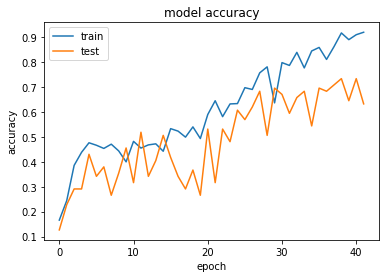

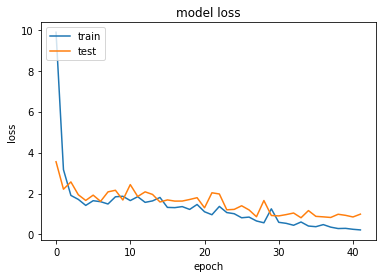

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
y_pred = final_model.predict([Z_test,X_test])

print(metrics.accuracy_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1)))


0.3112244897959184


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
25/25 [==============================] - 1s 27ms/step - loss: 1.8637 - accuracy: 0.4707 - val_loss: 0.7596 - val_accuracy: 0.7602
Epoch 2/100
25/25 [==============================] - 1s 22ms/step - loss: 1.3826 - accuracy: 0.5064 - val_loss: 1.1472 - val_accuracy: 0.5918
Epoch 3/100
25/25 [==============================] - 1s 23ms/step - loss: 1.3385 - accuracy: 0.4694 - val_loss: 1.0358 - val_accuracy: 0.6173
Epoch 4/100
25/25 [==============================] - 1s 22ms/step - loss: 1.2211 - accuracy: 0.5536 - val_loss: 1.1912 - val_accuracy: 0.5816
Epoch 5/100
25/25 [==============================] - 1s 23ms/step - loss: 1.1701 - accuracy: 0.5421 - val_loss: 1.0967 - val_accuracy: 0.5918
Epoch 6/100
25/25 [==============================] - 1s 22ms/step - loss: 1.1596 - accuracy: 0.5638 - val_loss: 0.9540 - val_accuracy: 0.6173
Epoch 7/100
25/25 [==============================] - 1s 24ms/step - loss

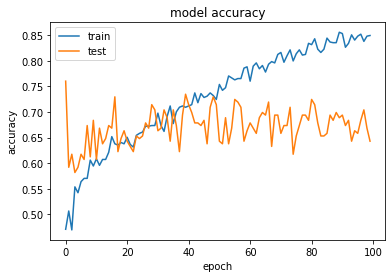

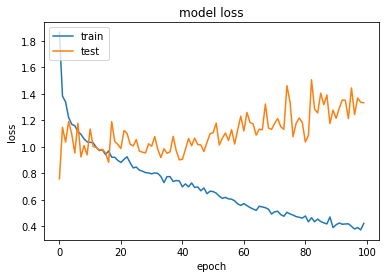

Epoch 1/100
25/25 [==============================] - 1s 27ms/step - loss: 0.6251 - accuracy: 0.8036 - val_loss: 0.3934 - val_accuracy: 0.8418
Epoch 2/100
25/25 [==============================] - 1s 28ms/step - loss: 0.5706 - accuracy: 0.8176 - val_loss: 0.4763 - val_accuracy: 0.8214
Epoch 3/100
25/25 [==============================] - 1s 26ms/step - loss: 0.5602 - accuracy: 0.8099 - val_loss: 0.4589 - val_accuracy: 0.8316
Epoch 4/100
25/25 [==============================] - 1s 24ms/step - loss: 0.5712 - accuracy: 0.8036 - val_loss: 0.3824 - val_accuracy: 0.8214
Epoch 5/100
25/25 [==============================] - 1s 26ms/step - loss: 0.5553 - accuracy: 0.8112 - val_loss: 0.4428 - val_accuracy: 0.8469
Epoch 6/100
25/25 [==============================] - 1s 25ms/step - loss: 0.5343 - accuracy: 0.8202 - val_loss: 0.4450 - val_accuracy: 0.8367
Epoch 7/100
25/25 [==============================] - 1s 27ms/step - loss: 0.5339 - accuracy: 0.8291 - val_loss: 0.7536 - val_accuracy: 0.7602
Epoch 

KeyboardInterrupt: 

In [16]:

from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.datasets import make_classification
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
import os
BS = 8
EPOCHS = 100
result=[]
scores_loss = []
scores_acc = []
k_no = 0
for train_index, test_index in kf.split(faces):
    X_Train= data.iloc[train_index]
    Z_Train = faces[train_index]
    Y_Train = dummy_y[train_index]
    X_Test= data.iloc[test_index]
    Y_Test= dummy_y[test_index]
    Z_Test = faces[test_index]

    # print(X_Test_,Z_Test)

    file_path = "./"+str(k_no)+".hdf5"
    checkpoint = ModelCheckpoint(file_path, monitor='loss', verbose=0, save_best_only=True, mode='min')
    early = EarlyStopping(monitor="loss", mode="min", patience=8)

    callbacks_list = [checkpoint, early]

    model = final_model
    history = model.fit_generator(aug.flow([Z_Train,X_Train], Y_Train), epochs=EPOCHS,validation_data=([Z_Test,X_Test], Y_Test), callbacks=callbacks_list, verbose=1)
    # model.fit([Z_Train,X_Train], Y_Train, batch_size=8, epochs=1, validation_data=([Z_Test,X_Test], Y_Test), verbose=1)
    print(history.history.keys())
    # summarize history for accuracyearly = EarlyStopping(monitor="loss", mode="min", patience=8)

    callbacks_list = [checkpoint, early]
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    model.load_weights(file_path)
    result.append(model.predict([Z_Test,X_Test]))
    score = model.evaluate([Z_Test,X_Test],Y_Test, verbose=0)
    scores_loss.append(score[0])
    scores_acc.append(score[1])
    k_no+=1

In [48]:
print(scores_acc,scores_loss)
value_min = min(scores_loss)
value_index = scores_loss.index(value_min)
print(value_index)

[0.5714285969734192, 0.7244898080825806, 0.8520408272743225, 0.9030612111091614, 0.8622449040412903] [1.4892070293426514, 0.9701837301254272, 0.43763938546180725, 0.2696031630039215, 0.3461819887161255]
3
